In [ ]:
## How to handle The missing Value.
## Working un the company we will get the raw data.

In [ ]:
## 1) MCAR missing completely at random ->
##  missing value are randomly distributed across all observations.
## 2) MAR missing at random -> 
## missing value are systematically related to the observed data but not the missing data.
## 3) NMAR not missing at random ->
## missing value are systematically related to the missing data.



In [2]:
## Examples
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
## missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
## delete the rows and the data points 
df.shape

(891, 15)

In [8]:
df.dropna().shape

(182, 15)

In [ ]:
## columns wise drop
df.dropna(axis=1).shape

## Imputation Missing Value
1- Mean Value Imputation


<Axes: xlabel='age', ylabel='Count'>

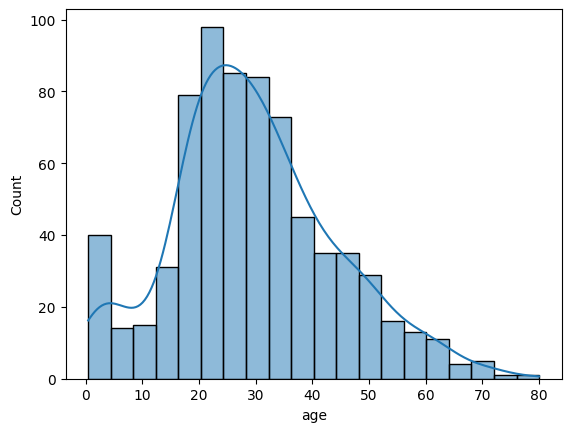

In [10]:
sns.histplot(df['age'],kde=True)

In [16]:
df["Age_mean"]=df['age'].fillna(df['age'].mean())
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
## MEan imputatio works well when we have normally distributed data

In [ ]:
#for other than we replace with median imputataion
## Median use if we have the outliers in the dataset


In [18]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','Age_mean','age']]

,Age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [19]:
## MODE IMputation technoques
# used in the categorical vlaues
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [26]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [27]:
df['embarked_mode']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked_mode, Length: 891, dtype: object

HANDLING IMBALANCED DATASET:

1) Up Sampling 
2) Down Sampling

In [64]:
import pandas as pd
import numpy as np
np.random.seed(123)

# create a dataframe
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio) 
n_class_1=n_samples-n_class_0

In [65]:
n_class_0,n_class_1

(900, 100)

In [67]:
class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2':np.random_normal(loc=0, scale=1, size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1,size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1]*n_class_1
})

AttributeError: module 'numpy' has no attribute 'random_normal'

In [68]:
## upsampling
df_minority=[df['target']==1]
df_majority=[df['target']==0]

In [ ]:
from sklearn.utils import resample
df_majority_upsampled=resample(df_majority,replace=True,
n_smaple=len(df_majority),
random_state=42)

from sklearn.utils import resample
df_majority_downupsampled=resample(df_majority,replace=false,
n_smaple=len(df_majority),
random_state=42)

SMOTE
Synthetic minority over-sampling tEchnique


In [38]:
from sklearn.datasets import make_classification
## make the binary or the multiclass dataset

In [39]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)
# weight for imbalance dataset

In [41]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [42]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

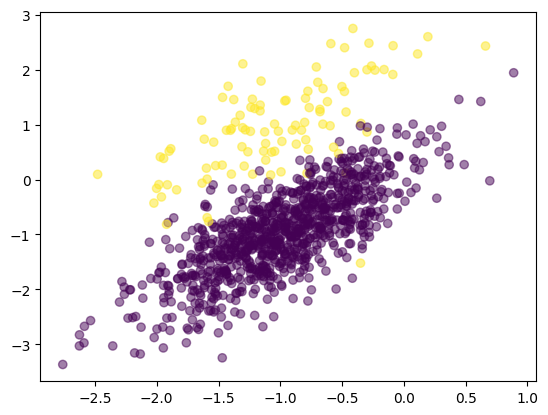

In [44]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'],alpha=0.5)

In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:

from imblearn.over_sampling import SMOTE

In [50]:
## transform the dataset
over_sampling=SMOTE()
X,y=over_sampling.fit_resample(final_df[['f1','f2']],final_df['target'])

In [52]:
X.shape

(1800, 2)

In [53]:
y.shape

(1800,)

In [56]:
len(y[y==0])

900

In [57]:
len(y[y==1])

900

In [58]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
over_sampling_df=pd.concat([df1,df2],axis=1)

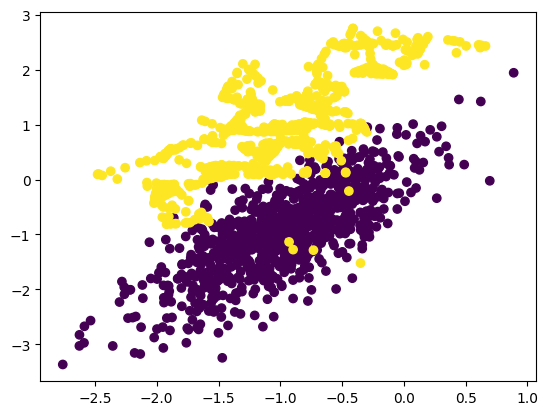

In [62]:
plt.scatter(over_sampling_df['f1'],over_sampling_df['f2'],c=over_sampling_df['target'])

Handling Outliers with Python:

5 number Summary and Box Plot

In [ ]:
#min,max,median,q1,q3,iqr

In [69]:
import numpy as np

In [71]:
list_marks=[45,32,56,75,89,54,32,87,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(list_marks,[0,0.25,0.50,0.75,1.0])

In [72]:
minimum

np.float64(32.0)

In [73]:
Q3

np.float64(84.0)

In [75]:
Q1

np.float64(47.25)

In [76]:
maximum

np.float64(99.0)

In [77]:
median

np.float64(61.5)

In [83]:
IQR=Q3-Q1
print(IQR)

36.75


In [89]:
Lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [90]:
Lower_fence

np.float64(-7.875)

In [84]:
higher_fence

np.float64(139.125)

In [91]:
list_marks=[45,32,56,75,89,54,32,87,54,45,98,99,67,74]


<Axes: >

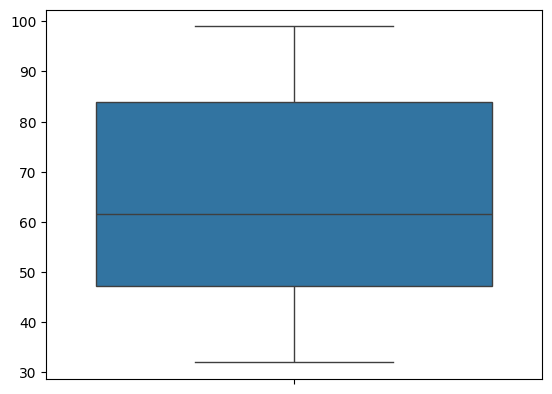

In [92]:
sns.boxplot(list_marks)

In [95]:
list_marks=[-100,-200,45,32,56,75,89,54,32,87,54,45,98,99,67,74,1000,1200,1300]


<Axes: >

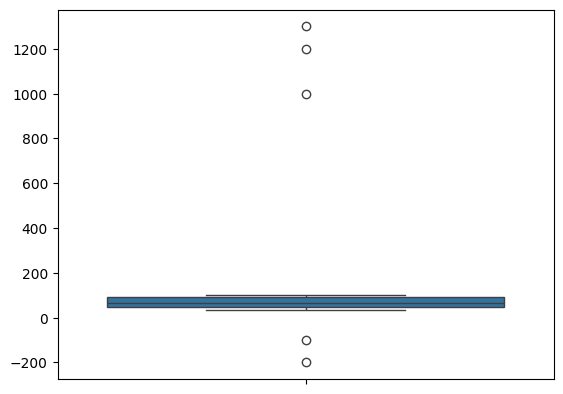

In [97]:
sns.boxplot(list_marks)

DATA ENCODING:
1. Nominal/OHE Encoding
2. Label nd Ordinal Encoding
3. Target Guided Ordinal Encoding

In [98]:
# not use the ohe encoding when we have the many number of features
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [133]:
##  create a sinple datfream
data=pd.DataFrame({
    'color':['red','blue','green','blue','red','green','red']
})

In [101]:
data.head()

,color
0,red
1,blue
2,green
3,blue
4,red


In [102]:
encoder=OneHotEncoder()

In [104]:
## perform fit and then transform
encoder_values=encoder.fit_transform(data[['color']]).toarray()

In [109]:
import pandas as pd
encoder_values_df=pd.DataFrame(encoder_values,columns=encoder.get_feature_names_out(['color']))
encoder_values_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0


In [111]:
import seaborn as sns
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [127]:
data2=pd.DataFrame({
    'sex':['Male','Female']
})

In [128]:
data2

,sex
0,Male
1,Female


In [130]:
encoded_values=encoder.fit_transform(data[['sex']]).toarray()

In [131]:
import pandas as pd
encoded_df=pd.DataFrame(encoded_values,columns=encoder.get_feature_names_out(['sex']))
encoded_values

array([[0., 1.],
       [1., 0.]])

LABEL ENCODING

In [134]:
data.head()

,color
0,red
1,blue
2,green
3,blue
4,red


In [135]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

In [136]:
lbl_encoder.fit_transform(data['color'])

array([2, 0, 1, 0, 2, 1, 2])

In [137]:
lbl_encoder.transform([['red']])

C:\Users\Kirat\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

ORDINAL ENCODING

In [ ]:
#Ordinal Encoding used to assign the ranks whcih label encoding not gibers

In [145]:
from sklearn.preprocessing import OrdinalEncoder

In [146]:
data3=pd.DataFrame({
    'size':['S','M','L','XL','M','S','L']   
})


In [147]:
data3

,size
0,S
1,M
2,L
3,XL
4,M
5,S
6,L


In [148]:
encoder=ordinalEncoder(categories=[['S','M','L','XL']])

NameError: name 'ordinalEncoder' is not defined

In [149]:
encoder.fit_transform(data3[['size']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (7, 4)>

Target Guided Ordinal Encoding

In [151]:
dataset=pd.DataFrame({
    'city':['A','B','C','A','B','C','A'],
    'target':[100,200,300,150,250,350,120]
})

In [152]:
dataset

,city,target
0,A,100
1,B,200
2,C,300
3,A,150
4,B,250
5,C,350
6,A,120


In [156]:
mean_price=dataset.groupby('city')['target'].mean().to_dict()

In [157]:
mean_price

{'A': 123.33333333333333, 'B': 225.0, 'C': 325.0}

In [159]:
dataset['city_encoded']=dataset['city'].map(mean_price)

In [163]:
dataset[['target','city_encoded']]

,target,city_encoded
0,100,123.333333
1,200,225.000000
2,300,325.000000
3,150,123.333333
4,250,225.000000
5,350,325.000000
6,120,123.333333


In [165]:
import seaborn as sns
sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
